# Ballon D'or Winner

<ol>
    <li>The purpose of this analysis is to predict who will be the 2023 Ballon D'or winner</li>
    <li>The dataset contains many variables that we will use to make this analysis</li>
</ol>

# Organization of Analysis

<ul>
    <li><b>Data Cleaning:</b> Dealing with missing values and wrong data, engineering features</li>
    <li><b>Data preprocessing:</b> Putting data in the right format and scale, data balancing</li>
    <li><b>Model Creation:</b> Creating models using a training and a testing dataset</li>
    <li><b>Model Evaluation:</b> Evaluating the model's goodness of fit</li>
    <li><b>Prediction:</b> Using model to predict who the next winner will be</li>
</ul>

# About the Data

<ul>
        <li>The data was mainly collected from <a href="https://fbref.com/en/comps/Big5/stats/squads/Big-5-EuropeanLeagues-Stats">FBREF</a></li>
        <li>Other resources were also used to complete the dataset</li>
        <li>I have a separate notebook dedicated to collecting the data, here is the link: </li>
        <li>The data consists of information about every player in the 5 major European Soccer Leagues from 2000 to 2023. There are both team level and player level data</li>
</ul>

### Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import random
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading data
pd.set_option('display.max_columns', None)
df = pd.read_csv('training_data.csv')
df.head()

,Rk_player,Player_player,Nation_player,Pos_player,Squad_player,Comp_player,Age_player,Born_player,MP_player,Starts_player,Min_player,90s_player,Gls_player,Ast_player,G+A_player,G-PK_player,PK_player,PKatt_player,CrdY_player,CrdR_player,season_player,LgRk_team,MP_team,W_team,D_team,L_team,GF_team,GA_team,GD_team,Pts_team,Pts/MP_team,Attendance_team,Top Team Scorer_team,Goalkeeper_team,Country_wc,Winner_wc,Runners-Up_wc,golden_ball_wc,silver_ball_wc,is_wc_yr,Champions_ca,best_player_ca,is_ca_yr,winner_ec,best_player_ec,is_ec_yr,Winner_cl,Runners-up_cl,winner_ballon
0,1,Jacques Abardonado,fr FRA,DF,Marseille,fr,22,1978,18,13,1193,13.3,1,0,1,1,0,0,2,0,2000-2001,15.0,34.0,11.0,7.0,16.0,31.0,40.0,-9.0,40.0,1.18,49711.0,Djamel Belmadi,Stéphane Trévisan,other,other,other,other,other,no,Colombia,Amado Guevara,yes,France,Zinédine Zidane,yes,Bayern Munchen,Valencia,Michael Owen
1,157,Ibrahima Bakayoko,ci CIV,FW,Marseille,fr,23,1976,26,11,1311,14.6,3,1,4,3,0,0,2,0,2000-2001,15.0,34.0,11.0,7.0,16.0,31.0,40.0,-9.0,40.0,1.18,49711.0,Djamel Belmadi,Stéphane Trévisan,other,other,other,other,other,no,Colombia,Amado Guevara,yes,France,Zinédine Zidane,yes,Bayern Munchen,Valencia,Michael Owen
2,227,Djamel Belmadi,dz ALG,MF,Marseille,fr,24,1976,29,23,2145,23.8,8,3,11,8,0,0,7,0,2000-2001,15.0,34.0,11.0,7.0,16.0,31.0,40.0,-9.0,40.0,1.18,49711.0,Djamel Belmadi,Stéphane Trévisan,other,other,other,other,other,no,Colombia,Amado Guevara,yes,France,Zinédine Zidane,yes,Bayern Munchen,Valencia,Michael Owen
3,242,Lucas Bernardi,ar ARG,MF,Marseille,fr,22,1977,8,8,694,7.7,0,0,0,0,0,0,4,0,2000-2001,15.0,34.0,11.0,7.0,16.0,31.0,40.0,-9.0,40.0,1.18,49711.0,Djamel Belmadi,Stéphane Trévisan,other,other,other,other,other,no,Colombia,Amado Guevara,yes,France,Zinédine Zidane,yes,Bayern Munchen,Valencia,Michael Owen
4,283,Patrick Blondeau,fr FRA,DF,Marseille,fr,32,1968,12,12,926,10.3,0,0,0,0,0,0,8,0,2000-2001,15.0,34.0,11.0,7.0,16.0,31.0,40.0,-9.0,40.0,1.18,49711.0,Djamel Belmadi,Stéphane Trévisan,other,other,other,other,other,no,Colombia,Amado Guevara,yes,France,Zinédine Zidane,yes,Bayern Munchen,Valencia,Michael Owen


# Data Cleaning & Processing

In [3]:
# dropping some incorrect data
df.drop(df[df['Rk_player'] == 'Rk'].index, inplace=True)

# dropping innecessary columns
cols_to_drop = ['Rk_player', '90s_player', 'PK_player', 'PKatt_player', 'LgRk_team', 'MP_team', 'Pts/MP_team', 
                'Attendance_team', 'Goalkeeper_team']

df.drop(cols_to_drop, axis=1, inplace=True)


# dropping 2000-2001 season
df.drop(df[df['season_player'] == '2000-2001'].index, inplace=True)

# Response variable
df['won_ballon'] = df['Player_player'] == df['winner_ballon'] 
df.loc[df['won_ballon'] == False, 'won_ballon'] = 0
df.loc[df['won_ballon'] == True, 'won_ballon'] = 1

In [4]:
# We can see some data imbalancing in the variable of interest "won_ballon"
df['won_ballon'].value_counts()

0    56663
1       19
Name: won_ballon, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56682 entries, 2602 to 61540
Data columns (total 41 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Player_player         56682 non-null  object 
 1   Nation_player         56609 non-null  object 
 2   Pos_player            56627 non-null  object 
 3   Squad_player          56682 non-null  object 
 4   Comp_player           56682 non-null  object 
 5   Age_player            56671 non-null  object 
 6   Born_player           56671 non-null  object 
 7   MP_player             56682 non-null  object 
 8   Starts_player         56682 non-null  object 
 9   Min_player            56682 non-null  object 
 10  Gls_player            56681 non-null  object 
 11  Ast_player            55874 non-null  object 
 12  G+A_player            55873 non-null  object 
 13  G-PK_player           56649 non-null  object 
 14  CrdY_player           56682 non-null  object 
 15  CrdR_player     

## Missing Values

In [6]:
df.isnull().sum()

Player_player              0
Nation_player             73
Pos_player                55
Squad_player               0
Comp_player                0
Age_player                11
Born_player               11
MP_player                  0
Starts_player              0
Min_player                 0
Gls_player                 1
Ast_player               808
G+A_player               809
G-PK_player               33
CrdY_player                0
CrdR_player                4
season_player              0
W_team                     0
D_team                     0
L_team                     0
GF_team                    0
GA_team                    0
GD_team                    0
Pts_team                   0
Top Team Scorer_team       0
Country_wc                 0
Winner_wc                  0
Runners-Up_wc              0
golden_ball_wc             0
silver_ball_wc             0
is_wc_yr                   0
Champions_ca               0
best_player_ca             0
is_ca_yr                   0
winner_ec     

#### Handling Missing Values

In [7]:
# dropping rows with few missing values
df.dropna(subset=['Nation_player'], inplace=True)
df.dropna(subset=['Pos_player'],  inplace=True)
df.dropna(subset=['Age_player'],  inplace=True)
df.dropna(subset=['Born_player'], inplace=True)
df.dropna(subset=['Gls_player'], inplace=True)
df.dropna(subset=['G-PK_player'], inplace=True)
df.dropna(subset=['CrdR_player'], inplace=True)

# Imputation
df['Ast_player'].fillna(df['Ast_player'].median(), inplace=True)
df['G+A_player'].fillna(df['G+A_player'].median(), inplace=True)
df['winner_ballon'].fillna('other', inplace=True)

### Numerical Variables

In [8]:
# converting to numeric
df['Age_player'] = df['Age_player'].astype('int')
df['MP_player'] = df['MP_player'].astype('int')
df['Starts_player'] = df['Starts_player'].astype('int')
df['Min_player'] = df['Min_player'].astype('int')
df['Gls_player'] = df['Gls_player'].astype('int')
df['Ast_player'] = df['Ast_player'].astype('int')
df['G+A_player'] = df['G+A_player'].astype('int')
df['G-PK_player'] = df['G-PK_player'].astype('int')
df['CrdY_player'] = df['CrdY_player'].astype('int')
df['CrdR_player'] = df['CrdR_player'].astype('int')
df['won_ballon'] = df['won_ballon'].astype('int')

In [9]:
df.sample(1000)

,Player_player,Nation_player,Pos_player,Squad_player,Comp_player,Age_player,Born_player,MP_player,Starts_player,Min_player,Gls_player,Ast_player,G+A_player,G-PK_player,CrdY_player,CrdR_player,season_player,W_team,D_team,L_team,GF_team,GA_team,GD_team,Pts_team,Top Team Scorer_team,Country_wc,Winner_wc,Runners-Up_wc,golden_ball_wc,silver_ball_wc,is_wc_yr,Champions_ca,best_player_ca,is_ca_yr,winner_ec,best_player_ec,is_ec_yr,Winner_cl,Runners-up_cl,winner_ballon,won_ballon
54818,Oier Sanjurjo,es ESP,MF,Osasuna,es,34,1986,32,24,2084,0,2,2,0,10,0,2020-2021,11.0,11.0,16.0,37.0,48.0,-11.0,44.0,Ante Budimir,other,other,other,other,other,no,Argentina,Lionel Messi,yes,Italy,Gianluigi Donnarumma,yes,Chelsea,Manchester City,Lionel Messi,0
23564,Freddie Sears,eng ENG,"FW,MF",West Ham,eng,18,1989,17,4,453,0,0,0,0,0,0,2008-2009,14.0,9.0,15.0,42.0,45.0,-3.0,51.0,Carlton Cole,other,other,other,other,other,no,other,other,no,Spain,Xavi,yes,Barcelona,Manchester U.,Lionel Messi,0
42123,Patrick Roberts,eng ENG,"FW,MF",Manchester City,eng,18,1997,1,0,5,0,0,0,0,0,0,2015-2016,19.0,9.0,10.0,71.0,41.0,30.0,66.0,Sergio Agüero,other,other,other,other,other,no,Chile,Alexis Sánchez,yes,other,other,no,Real Madrid,Atletico,Cristiano Ronaldo,0
50902,Arthur Melo,br BRA,MF,Barcelona,es,21,1996,27,19,1430,0,1,1,0,2,0,2018-2019,26.0,9.0,3.0,90.0,36.0,54.0,87.0,Lionel Messi,other,other,other,other,other,no,Brazil,Dani Alves,yes,other,other,no,Liverpool,Tottenham,Lionel Messi,0
58474,Leroy Sané,de GER,"FW,MF",Bayern Munich,de,25,1996,32,22,1976,7,7,14,7,3,0,2021-2022,24.0,5.0,5.0,97.0,37.0,60.0,77.0,Robert Lewandowski,other,other,other,other,other,no,other,other,no,other,other,no,Real Madrid,Liverpool,Karim Benzema,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28528,Bruno Soriano,es ESP,MF,Villarreal,es,26,1984,37,36,3276,0,1,1,0,9,0,2010-2011,18.0,8.0,12.0,54.0,44.0,10.0,62.0,Giuseppe Rossi,other,other,other,other,other,no,Uruguay,Luis Suárez,yes,other,other,no,Barcelona,Manchester United,Lionel Messi,0
31186,Benjamin Lecomte,fr FRA,GK,Lorient,fr,20,1991,5,4,429,0,0,0,0,0,0,2011-2012,9.0,12.0,17.0,35.0,49.0,-14.0,39.0,Kévin Monnet,other,other,other,other,other,no,other,other,no,other,other,no,Chelsea,Bayern Munchen,Lionel Messi,0
37159,Sebastian Langkamp,de GER,DF,Hertha BSC,de,25,1988,29,29,2506,0,0,0,0,6,0,2013-2014,11.0,8.0,15.0,40.0,48.0,-8.0,41.0,Adrián Ramos,Brazil,Germany,Argentina,Lionel Messi,Thomas Müller,yes,other,other,no,other,other,no,Real Madrid,Atletico,Cristiano Ronaldo,0
8404,Fabrizio Ficini,it ITA,MF,Empoli,it,29,1973,30,27,2289,0,1,1,0,6,0,2003-2004,7.0,9.0,18.0,26.0,54.0,-28.0,30.0,Tommaso Rocchi,other,other,other,other,other,no,Brazil,Adriano,yes,other,other,no,Porto,Monaco,Andriy Shevchenko,0


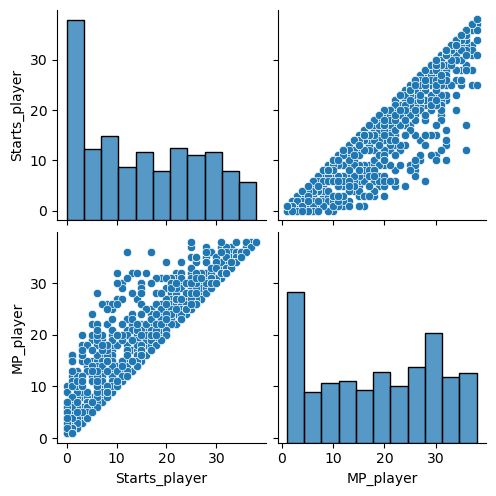

In [10]:
# Sample a subset of columns (e.g., 12 columns) from the DataFrame
selected_columns = random.sample(list(df.columns), 12)
sample_df = df.sample(1000)

# Create a new DataFrame with the selected columns
df_subset = sample_df[selected_columns]

# Create the pair plot for the subset of columns
sns.pairplot(df_subset)

plt.show()

### Categorical Variables
#### Label Encoding
<ul>
    <li>Employing label encoding technique to convert categorical columns to numerical columns</li>
</ul>

In [11]:
cat_cols = df.select_dtypes(include='object').columns

df2 = df.copy()

# Importing Label Encoder class and creating an instance of it
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])
    
df.head(1)

,Player_player,Nation_player,Pos_player,Squad_player,Comp_player,Age_player,Born_player,MP_player,Starts_player,Min_player,Gls_player,Ast_player,G+A_player,G-PK_player,CrdY_player,CrdR_player,season_player,W_team,D_team,L_team,GF_team,GA_team,GD_team,Pts_team,Top Team Scorer_team,Country_wc,Winner_wc,Runners-Up_wc,golden_ball_wc,silver_ball_wc,is_wc_yr,Champions_ca,best_player_ca,is_ca_yr,winner_ec,best_player_ec,is_ec_yr,Winner_cl,Runners-up_cl,winner_ballon,won_ballon
2602,5929,49,0,116,3,23,16,28,26,2235,0,1,1,0,5,0,0,7.0,10.0,17.0,43.0,64.0,-21.0,31.0,493,2,1,3,3,3,1,4,6,0,4,5,0,9,2,9,0


<ul>
    Storing this year's data in a different dataframe and dropping it from main dataframe
</ul>

In [12]:
# this is the data from this year that we will use to predict the winner of this year
next_yr_df = df.tail(2888)
# we're dropping this data from the data that we will use to train the model
df.drop(next_yr_df.index, inplace=True)

# Modeling

### Splitting Data and Data Balancing

<ul>
    <li>There is a class imbalance challenge in the response variable "won_ballon". We have data for an average of 2684 players per season from which only one wins the award per season.</li>
    <li>The challenge is that we have very few data points of ballon d'or winners and too many data points of non winners</li>
        <li>To address this, I employed a data balancing technique called SMOTE (Synthetic Minority Over-sampling Technique) which creates synthetic samples for the minority class without introducing exact duplicates. </li>
    <li><a href="https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/">More on SMOTE</a> </li>
</ul>

In [13]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = df.drop('won_ballon', axis=1)
y = df['won_ballon']

# using the train test split function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

# Balancing dataset
# Create the SMOTE object - sampling_strategy parameter controls the level of balance
smote = SMOTE(sampling_strategy=0.60, random_state=42)

# Apply SMOTE to generate synthetic samples for the minority class
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

### Logistic Regression Model Fitting

p represents the probability of the event ocurring and 1 - p represents the probability of the event not ocurring, p / 1 - p represents the odds of the event occurring to which we will apply the logit transformation which maps the linear combination of predictors and coefficients (the log-odds) to the probability space (the range [0, 1])

<ul>
    <ol><b>\[
\text{logit}(p_i) = \ln\left(\frac{p_i}{1 - p_i}\right)
\]</b></ol>
      
</ul>



$$
\ln\left(\frac{p_i}{1 - p_i}\right) = b_0 + b_1 x
$$

This is the final equation, the model's job is to estimate the y-intercept (b0) and the model's coefficient (b1) and then we could use this formula to get our predictions

$$
p_i = \frac{e^{(b_0 + b_1 x_1)}}{1 + e^{(b_0 + b_1 x_1)}}
$$

In [14]:
import statsmodels.api as sm

# Add a constant column to X_train for the intercept term in the logistic regression model
X_train = sm.add_constant(X_train)

# Create and fit the logistic regression model
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit_regularized(method='l1', alpha=1.0)

# Print the summary of the model
print(result.summary())

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.0015361219654494347
            Iterations: 318
            Function evaluations: 337
            Gradient evaluations: 318
                           Logit Regression Results                           
Dep. Variable:             won_ballon   No. Observations:                40256
Model:                          Logit   Df Residuals:                    40215
Method:                           MLE   Df Model:                           40
Date:                Thu, 10 Aug 2023   Pseudo R-squ.:                  0.6048
Time:                        15:45:33   Log-Likelihood:                -58.923
converged:                       True   LL-Null:                       -149.08
Covariance Type:            nonrobust   LLR p-value:                 1.013e-19
                           coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------

# Model Testing

### Making Predictions on Test Data

In [15]:
# Add a constant column to X_test for the intercept term in the logistic regression model
X_test = sm.add_constant(X_test)

# Use the trained model to make predictions on the test data
y_pred = result.predict(X_test)
y_pred_binary = (y_pred >= 0.5).astype(int)

### Classification Report

<ul>
    <li><b>Precision:</b> The proportion of true positive predictions out of all positive predictions for the class</li>
    <li><b>Recall (Sensitivity):</b> The proportion of true positive predictions out of all actual positive samples for the class.</li>
    <li><b>F1-score:</b> The harmonic mean of precision and recall, which provides a balanced measure between the two</li>
    <li><b>Support:</b> The number of samples in each class.</li>
</ul>

In [16]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, y_pred_binary)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13417
           1       0.25      0.50      0.33         2

    accuracy                           1.00     13419
   macro avg       0.62      0.75      0.67     13419
weighted avg       1.00      1.00      1.00     13419



### Confusion Matrix
<ul>
    <li>TN (True Negatives): The number of samples predicted as class 0 (negative) correctly</li>
    <li>FP (False Positives): The number of samples predicted as class 1 (positive) incorrectly</li>
    <li>FN (False Negatives): The number of samples predicted as class 0 (negative) incorrectly</li>
    <li>TP (True Positives): The number of samples predicted as class 1 (positive) correctly</li>
</ul>

In [17]:
#          Predicted
#            |  0  |  1  |
# ------------------------
# Actual 0  | TN  | FP  |
# ------------------------
#        1  | FN  | TP  |
# ------------------------
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[13414     3]
 [    1     1]]


# Predicting Probabilities of Next Ballon Do'r Winner

In [18]:
next_yr_df.drop(['won_ballon'], axis=1, inplace=True)
next_yr_df['const'] = 1.0
cols = next_yr_df.columns.tolist()
cols = ['const'] + [col for col in cols if col != 'const']
next_yr_df = next_yr_df[cols]

# Use the trained model to make predictions on the new data
y_pred_prob = result.predict(next_yr_df)

In [19]:
winner_df = pd.DataFrame({'player': df2.tail(2888)['Player_player'].tolist(),
                          'prob': y_pred_prob})

winner_df.sort_values(by='prob', ascending=False).head(10)

,player,prob
61326,Lionel Messi,0.018141
59852,Erling Haaland,0.015454
61324,Kylian Mbappé,0.004544
59845,Kevin De Bruyne,0.003773
61181,Antoine Griezmann,0.003219
60778,Alexandre Lacazette,0.002531
61328,Neymar,0.002158
59851,İlkay Gündoğan,0.001708
60158,Mohamed Salah,0.001355
59959,Karim Benzema,0.001289


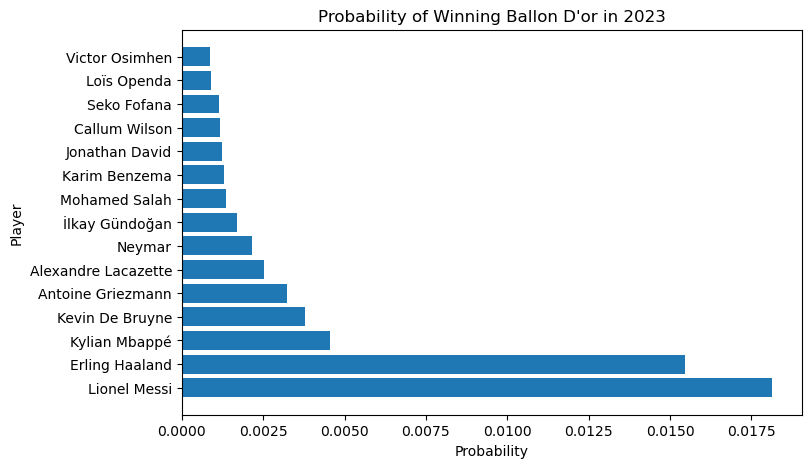

In [27]:
plt.figure(figsize=(8,5))

y_barh = winner_df.sort_values(by='prob', ascending=False).head(15)['player']
x_barh = winner_df.sort_values(by='prob', ascending=False).head(15)['prob']

plt.barh(y_barh, x_barh)

plt.title("Probability of Winning Ballon D'or in 2023")
plt.xlabel("Probability")
plt.ylabel("Player")
plt.show()